In [35]:
# 将训练集，测试集和验证集按时间序列（单位：小时）排好 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.io as sio
import numpy as np

data = sio.loadmat('processed_data_dict.mat')
user_id = 0
load_all = 1
train_load = 2
val_load = 3
test_load = 4
exist_load = 5

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

train_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    l_data = np.array([user[train_load] for user in district_data])
    print(l_data.shape)
    num_users, num_hours, num_days = l_data.shape
    transformed_l_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_l_data[i, j * num_hours + k] = l_data[i, k, j]
                train_time_series[district] = transformed_l_data    
    transformed_l_data = np.array(transformed_l_data)
    print(transformed_l_data.shape)     
    train_time_series[district] = transformed_l_data

val_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    v_data = np.array([user[val_load] for user in district_data])
    print(v_data.shape)
    num_users, num_hours, num_days = v_data.shape
    transformed_v_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_v_data[i, j * num_hours + k] = v_data[i, k, j]
                val_time_series[district] = transformed_v_data    
    transformed_v_data = np.array(transformed_v_data)
    print(transformed_v_data.shape)     
    val_time_series[district] = transformed_v_data

test_time_series = {}
for district in data:
    if district.startswith('__'):
        continue
    district_data = data[district]
    t_data = np.array([user[test_load] for user in district_data])
    print(t_data.shape)
    num_users, num_hours, num_days = t_data.shape
    transformed_t_data = np.zeros((num_users, num_hours * num_days))
    for i in range(num_users):
         for j in range(num_days):
            for k in range(num_hours):
                transformed_t_data[i, j * num_hours + k] = t_data[i, k, j]
                test_time_series[district] = transformed_t_data    
    transformed_t_data = np.array(transformed_t_data)
    print(transformed_t_data.shape)     
    test_time_series[district] = transformed_t_data
print(test_time_series['A_user_data'])


(711, 24, 120)
(711, 2880)
(473, 24, 120)
(473, 2880)
(584, 24, 120)
(584, 2880)
(708, 24, 120)
(708, 2880)
(174, 24, 120)
(174, 2880)
(1000, 24, 120)
(1000, 2880)
(2650, 24, 120)
(2650, 2880)
(711, 24, 15)
(711, 360)
(473, 24, 15)
(473, 360)
(584, 24, 15)
(584, 360)
(708, 24, 15)
(708, 360)
(174, 24, 15)
(174, 360)
(1000, 24, 15)
(1000, 360)
(2650, 24, 15)
(2650, 360)
(711, 24, 15)
(711, 360)
(473, 24, 15)
(473, 360)
(584, 24, 15)
(584, 360)
(708, 24, 15)
(708, 360)
(174, 24, 15)
(174, 360)
(1000, 24, 15)
(1000, 360)
(2650, 24, 15)
(2650, 360)
[[0.2345 0.1205 0.118  ... 1.242  1.083  1.0395]
 [0.488  0.4155 0.2585 ... 0.741  0.678  0.3555]
 [0.415  0.315  0.89   ... 1.152  0.91   0.6785]
 ...
 [0.6025 0.395  0.3645 ... 2.233  2.0965 1.907 ]
 [0.608  0.2165 0.1895 ... 1.038  0.9225 0.8295]
 [0.217  0.255  0.2565 ... 0.758  0.4865 0.246 ]]


In [36]:

# 对用户数维度加和，归一化
scaler = MinMaxScaler(feature_range=(0, 1))
for district in train_time_series:
        train_time_series[district] = np.sum(train_time_series[district],axis=0)
        train_time_series[district] = scaler.fit_transform(train_time_series[district].reshape(-1,1))
        print(train_time_series[district].shape)
#print(train_time_series['A_user_data'])
for district in val_time_series:
        val_time_series[district] = np.sum(val_time_series[district],axis=0)
        val_time_series[district] = scaler.fit_transform(val_time_series[district].reshape(-1,1))
        print(val_time_series[district].shape)
#print(val_time_series['A_user_data'])
for district in test_time_series:
        test_time_series[district] = np.sum(test_time_series[district],axis=0)
        test_time_series[district] = scaler.fit_transform(test_time_series[district].reshape(-1,1))
        print(test_time_series[district].shape)
#print(test_time_series['A_user_data'])

(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(2880, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)


In [37]:
x_train = []
y_train = []
for i in range(len(train_time_series['A_user_data'])-24*3-4+1):
    x_train.append(train_time_series['A_user_data'][i:i+24*3].flatten())
    y_train.append(train_time_series['A_user_data'][i+24*3:i+24*3+4].flatten())
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(2805, 72)
(2805, 4)


In [38]:
x_val = []
y_val = []
for i in range(len(val_time_series['A_user_data'])-24*3-4+1):
    x_val.append(val_time_series['A_user_data'][i:i+24*3].flatten())
    y_val.append(val_time_series['A_user_data'][i+24*3:i+24*3+4].flatten())
x_val = np.array(x_val)
y_val = np.array(y_val)
print(x_val.shape)
print(y_val.shape)

(285, 72)
(285, 4)


In [39]:
x_test = []
y_test = []
for i in range(len(test_time_series['A_user_data'])-24*3-4+1):
    x_test.append(test_time_series['A_user_data'][i:i+24*3].flatten())
    y_test.append(test_time_series['A_user_data'][i+24*3:i+24*3+4].flatten())
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(285, 72)
(285, 4)


In [40]:
import torch

x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_val_tensor.shape)
print(y_val_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([2805, 72])
torch.Size([2805, 4])
torch.Size([285, 72])
torch.Size([285, 4])
torch.Size([285, 72])
torch.Size([285, 4])


In [41]:
from torch.utils.data import DataLoader, TensorDataset
batch_size = 32
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [42]:
input_size = 72
output_size =4
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP,self).__init__()
        self.fc1 = nn.Linear(input_size,128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128,64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64,output_size)
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [43]:
import torch.optim as optim

model = MLP(input_size,output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)
epochs = 800
best_val_loss = float('inf')
best_model_state = None

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    
    val_loss /= len(val_loader.dataset)
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        torch.save(best_model_state, 'MLP.pth')
print("Best model saved with validation loss: {:.4f}".format(best_val_loss))    
    

Epoch [1/800], Train Loss: 0.1212, Val Loss: 0.1694
Epoch [101/800], Train Loss: 0.0047, Val Loss: 0.0081
Epoch [201/800], Train Loss: 0.0041, Val Loss: 0.0072
Epoch [301/800], Train Loss: 0.0038, Val Loss: 0.0067
Epoch [401/800], Train Loss: 0.0035, Val Loss: 0.0063
Epoch [501/800], Train Loss: 0.0033, Val Loss: 0.0060
Epoch [601/800], Train Loss: 0.0032, Val Loss: 0.0056
Epoch [701/800], Train Loss: 0.0030, Val Loss: 0.0054
Best model saved with validation loss: 0.0052


In [44]:
model.load_state_dict(torch.load('MLP.pth'))
model.eval()
test_loss = 0.0
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item() * inputs.size(0)
        predictions.append(outputs.numpy())
        actuals.append(targets.numpy())

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0048


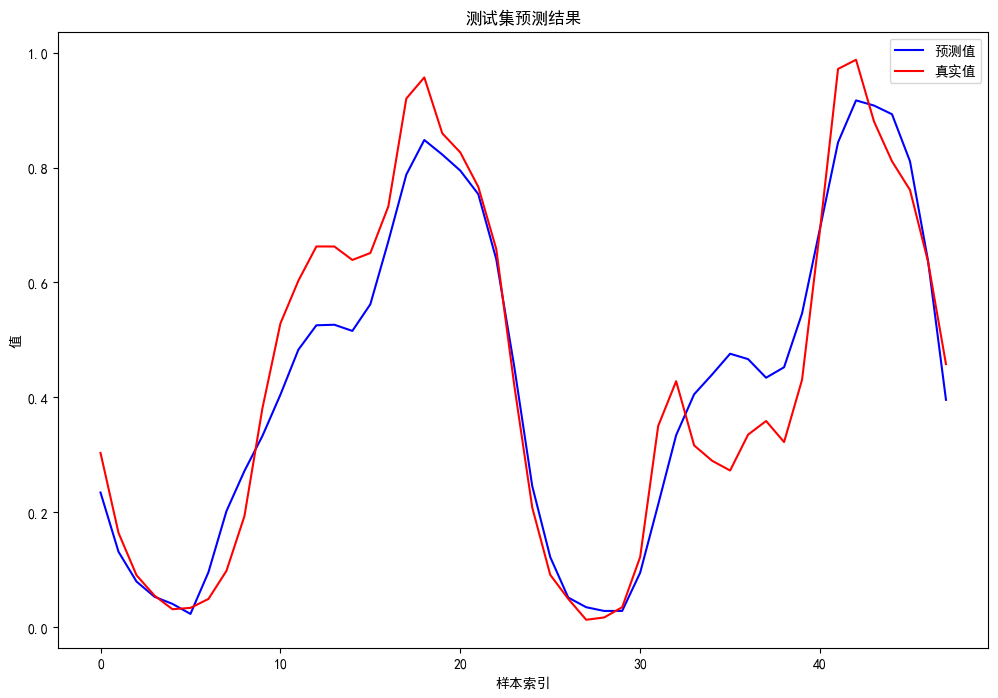

In [45]:

predictions = np.concatenate(predictions,axis=0)
actuals = np.concatenate(actuals,axis=0)

plot_size = 48
plt.figure(figsize=(12, 8))
plt.plot(predictions[:plot_size, 0], "b", label='预测值')
plt.plot(actuals[:plot_size, 0], "r", label='真实值')
plt.legend(loc='best')
plt.title('测试集预测结果')
plt.xlabel('样本索引')
plt.ylabel('值')
plt.show()

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

R2 = r2_score(actuals,predictions)
MAE = mean_absolute_error(actuals,predictions)
RMSE = np.sqrt(mean_squared_error(actuals,predictions))
MAPE = np.mean(np.abs(actuals-predictions)/predictions)
print('R2:',R2)
print('MAE:',MAE)
print('RMSE:',RMSE)
print('MAPE:',MAPE)

R2: 0.9462755777838345
MAE: 0.05276054
RMSE: 0.06938275
MAPE: 0.17487775
